<a href="https://colab.research.google.com/github/nithb007/1BM23AI113_DEEPLEARNING_LAB/blob/main/DEL_CNN_113.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
422/422 - 12s - 30ms/step - accuracy: 0.8811 - loss: 0.3818 - val_accuracy: 0.9802 - val_loss: 0.0701
Epoch 2/5
422/422 - 2s - 4ms/step - accuracy: 0.9625 - loss: 0.1247 - val_accuracy: 0.9847 - val_loss: 0.0537
Epoch 3/5
422/422 - 2s - 4ms/step - accuracy: 0.9726 - loss: 0.0936 - val_accuracy: 0.9877 - val_loss: 0.0434
Epoch 4/5
422/422 - 2s - 4ms/step - accuracy: 0.9771 - loss: 0.0769 - val_accuracy: 0.9888 - val_loss: 0.0384
Epoch 5/5
422/422 - 2s - 4ms/step - accuracy: 0.9793 - loss: 0.0680 - val_accuracy: 0.9902 - val_loss: 0.0341
313/313 - 2s - 6ms/step - accuracy: 0.9893 - loss: 0.0291
Test Accuracyy:0.9893


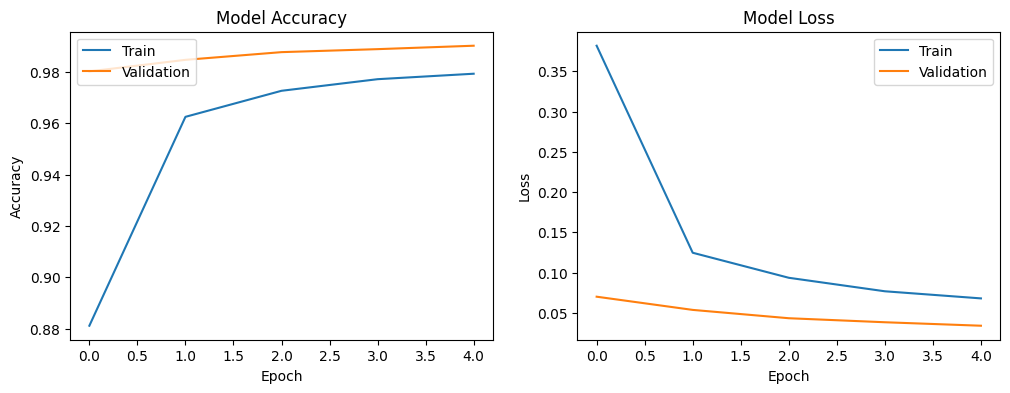

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


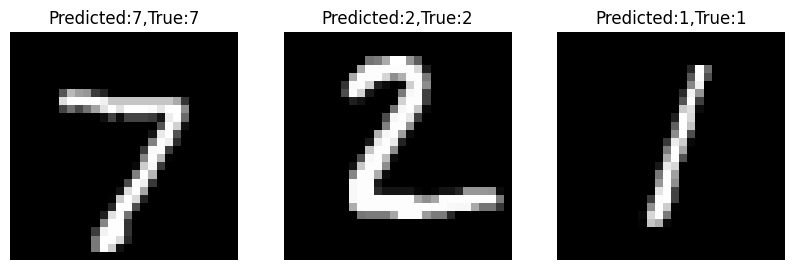

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0
x_train=x_train.reshape((x_train.shape[0],28,28,1))
x_test=x_test.reshape((x_test.shape[0],28,28,1))
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
from tensorflow.keras.layers import Input

model=Sequential([Input(shape=(28,28,1)),
                  Conv2D(32,kernel_size=(3,3),activation='relu'),
                            MaxPooling2D(pool_size=(2,2)),
                            Dropout(0.25),
                  Conv2D(64,kernel_size=(3,3),activation='relu'),
                  MaxPooling2D(pool_size=(2,2)),
                  Dropout(0.25),
                  Flatten(),
                  Dense(128,activation='relu'),
                  Dropout(0.5),
                  Dense(10,activation='softmax')])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,validation_split=0.1,epochs=5,batch_size=128,verbose=2)
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)
print(f'Test Accuracyy:{test_acc:.4f}')
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()
import numpy as np
predictions=model.predict(x_test)
predicted_labels=[tf.argmax(tf.convert_to_tensor(prediction)).numpy() for prediction in predictions]
plt.figure(figsize=(10,4))
num_images=3
for i in range(num_images):
  plt.subplot(1,num_images,i+1)
  plt.imshow(x_test[i].reshape(28,28),cmap='gray')
  plt.title(f'Predicted:{predicted_labels[i]},True:{np.argmax(y_test[i])}')
  plt.axis('off')
plt.show()
